# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.714  1  0.956 0.329 0.005   
                             age        0.126  1  0.169 0.681 0.001   
                             Kiel       2.457  1  3.289 0.071 0.017   
                             Magdeburg  5.150  1  6.894 0.009 0.035   
                             Sweden     7.770  1 10.401 0.001 0.052   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.638  1  0.740 0.391 0.004   
                             age        1.195  1  1.385 0.241 0.007   
                             Kiel       0.001  1  0.001 0.975 0.000   
                             Magdeburg  2.031  1  2.355 0.127 0.012   
                             Sweden    15.275  1 17.706 0.000 0.085   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.482  0.494    False  
                             age               0.167  0.792    False  
                             Kiel              1.147  0.162    False  
                             Magdeburg         2.029  0.032     True  
                             Sweden            2.829  0.007     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.408  0.552    False  
                             age               0.618  0.398    False  
                             Kiel              0.011  0.986    False  
                             Magdeburg         0.898  0.252    False  
                             Sweden            4.402  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      RF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.975  1  7.396 0.007 0.037   
                             age        0.003  1  0.024 0.878 0.000   
                             Kiel       0.209  1  1.589 0.209 0.008   
                             Magdeburg  0.392  1  2.972 0.086 0.015   
                             Sweden     1.534  1 11.637 0.001 0.057   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.596  1  3.297 0.071 0.017   
                             age        0.537  1  1.109 0.294 0.006   
                             Kiel       1.867  1  3.858 0.051 0.020   
                             Magdeburg  1.943  1  4.015 0.047 0.021   
                             Sweden    13.593  1 28.092 0.000 0.128   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.146  0.021     True  
                             age               0.057  0.923    False  
                             Kiel              0.680  0.334    False  
                             Magdeburg         1.064  0.166    False  
                             Sweden            3.103  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.149  0.142    False  
                             age               0.532  0.432    False  
                             Kiel              1.293  0.109    False  
                             Magdeburg         1.332  0.101    False  
                             Sweden            6.498  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.329         0.482  0.494    False   
                             age       0.681         0.167  0.792    False   
                             Kiel      0.071         1.147  0.162    False   
                             Magdeburg 0.009         2.029  0.032     True   
                             Sweden    0.001         2.829  0.007     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.391         0.408  0.552    False   
                             age       0.241         0.618  0.398    False   
                             Kiel      0.975         0.011  0.986    False   
                             Magdeburg 0.127         0.898  0.252    False   
                             Sweden    0.000         4.402  0.000     True   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.146  0.021     True  
                             age       0.878         0.057  0.923    False  
                             Kiel      0.209         0.680  0.334    False  
                             Magdeburg 0.086         1.064  0.166    False  
                             Sweden    0.001         3.103  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.071         1.149  0.142    False  
                             age       0.294         0.532  0.432    False  
                             Kiel      0.051         1.293  0.109    False  
                             Magdeburg 0.047         1.332  0.101    False  
                             Sweden    0.000         6.498  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.474     0.337     0.233         3.095     0.292
std       0.300         5.321     0.328     0.296         5.825     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.337     0.015     0.001         0.386     0.003
50%       0.124         0.908     0.247     0.072         1.145     0.143
75%       0.460         2.425     0.614     0.412         3.096     0.549
max       1.000       145.313     1.000     0.999        84.080     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.329         0.482   
A0A024R0T9;K7ER74;P02655                           AD     0.039         1.414   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.032         1.494   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.603         0.220   
A0A075B6H7                                         AD     0.085         1.069   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.014         1.842   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.577         0.239   
S4R3U6                                             AD     0.391         0.408   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.494    False   
A0A024R0T9;K7ER74;P02655                           AD      0.100    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.087    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.732    False   
A0A075B6H7                                         AD      0.187    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.317    False   
Q9Y6X5                                             AD      0.046     True   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.184    False   
Q9Y6Y9                                             AD      0.711    False   
S4R3U6                                             AD      0.552    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.146   
A0A024R0T9;K7ER74;P02655                           AD     0.030         1.528   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.440         0.356   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.249         0.603   
A0A075B6H7                                         AD     0.001         3.119   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.222         0.653   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.427         0.369   
S4R3U6                                             AD     0.071         1.149   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.021     True  
A0A024R0T9;K7ER74;P02655                           AD      0.069    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.575    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.382    False  
A0A075B6H7                                         AD      0.003     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.254         1.404     0.337     0.249         1.510     0.314
std       0.291         1.656     0.315     0.296         1.751     0.319
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.013         0.358     0.043     0.009         0.369     0.027
50%       0.120         0.922     0.242     0.105         0.980     0.194
75%       0.439         1.871     0.596     0.427         2.025     0.563
max       1.000        23.434     1.000     0.998        18.342     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1040,975


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.329         0.482  0.494   
A0A024R0T9;K7ER74;P02655                           0.039         1.414  0.100   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.032         1.494  0.087   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.603         0.220  0.732   
A0A075B6H7                                         0.085         1.069  0.187   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.317   
Q9Y6X5                                             0.014         1.842  0.046   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.184   
Q9Y6Y9                                             0.577         0.239  0.711   
S4R3U6                                             0.391         0.408  0.552   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.007   
A0A024R0T9;K7ER74;P02655                              False 0.030   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.440   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.249   
A0A075B6H7                                            False 0.001   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                 True 0.222   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.427   
S4R3U6                                                False 0.071   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.146  0.021   
A0A024R0T9;K7ER74;P02655                                   1.528  0.069   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.356  0.575   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.603  0.382   
A0A075B6H7                                                 3.119  0.003   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.291   
Q9Y6X5                                                     0.653  0.349   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.162   
Q9Y6Y9                                                     0.369  0.563   
S4R3U6                                                     1.149  0.142   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    912
PI (yes) - RF (yes)   318
PI (no)  - RF (yes)   128
PI (yes) - RF (no)     63
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                  RF  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.329         0.482  0.494    False 0.007   
A0A075B6H7                   0.085         1.069  0.187    False 0.001   
A0A075B6H9                   0.515         0.288  0.662    False 0.019   
A0A075B6J9                   0.096         1.018  0.205    False 0.015   
A0A075B6R2                   0.353         0.452  0.516    False 0.003   
...                            ...           ...    ...      ...   ...   
Q9ULZ9                       0.000         3.624  0.001     True 0.063   
Q9UNW1                       0.014         1.868  0.044     True 0.916   
Q9UP79                       0.324         0.490  0.489    False 0.000   
Q9UQ52                       0.085         1.070  0.186    False 0.001   
Q9Y6X5                       0.014         1.842  0.046     True 0.222   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.146  0.021     True       186  
A0A075B6H7                           3.119  0.003     True        91  
A0A075B6H9                           1.710  0.049     True       189  
A0A075B6J9                           1.832  0.039     True       156  
A0A075B6R2                           2.497  0.011     True       164  
...                                    ...    ...      ...       ...  
Q9ULZ9                               1.199  0.129    False       171  
Q9UNW1                               0.038  0.948    False       171  
Q9UP79                               4.042  0.000     True       135  
Q9UQ52                               3.129  0.003     True       188  
Q9Y6X5                               0.653  0.349    False       173  

[191 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.494,0.021,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.100,0.069,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.087,0.575,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.732,0.382,196,PI (no) - RF (no)
A0A075B6H7,0.187,0.003,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.317,0.291,197,PI (no) - RF (no)
Q9Y6X5,0.046,0.349,173,PI (yes) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.184,0.162,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q96PQ0,0.004,0.982,177,PI (yes) - RF (no),0.979
F6VDH7;P50502;Q3KNR6,0.014,0.981,175,PI (yes) - RF (no),0.966
A0A087X152;D6RE16;E0CX15;O95185;O95185-2,0.038,0.982,176,PI (yes) - RF (no),0.944
P17931,0.982,0.043,174,PI (no) - RF (yes),0.939
P22692;P22692-2,0.982,0.047,170,PI (no) - RF (yes),0.935
...,...,...,...,...,...
Q9NX62,0.056,0.047,197,PI (no) - RF (yes),0.009
P00740;P00740-2,0.053,0.045,197,PI (no) - RF (yes),0.009
K7ERG9;P00746,0.052,0.044,197,PI (no) - RF (yes),0.009


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


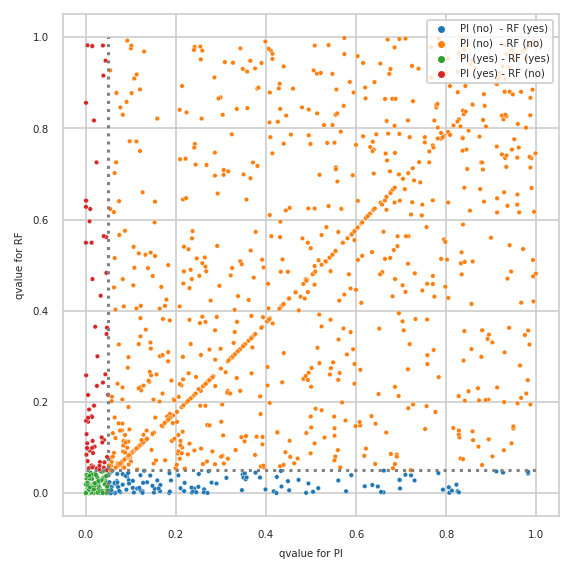

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


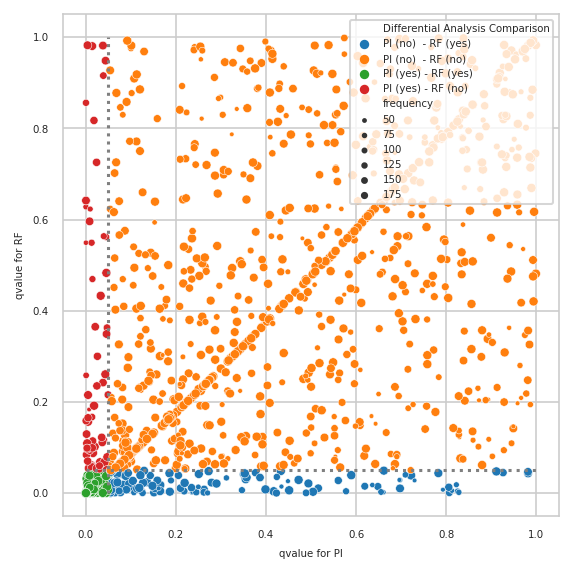

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out